TIEMPO DE VIDA MEDIA DE UNA PARTICULA $\pi$


El modelo teórico indica que la variación del conteo de partículas es proporcional al número inicial de partículas existentes. Por lo que $\frac{d N}{dt}=\alpha N_{0}$. $N(t)$ corresponde al número de partículas en un instante t.  El modelo se resume a $N(t)=N_{0}\exp{(-\lambda t)}$, donde $\frac{1}{\tau}= \lambda$ corresponde al tiempo de vida mida de las partículas $\pi$

Se cuenta con el siguiente conjunto de datos:

t = 1e-9*(5,15,25,35, 45,55,65,75,85,95, 105,115) [segundos]

N(t) = (32, 17,21,7.5,8, 7, 5, 2, 4, 3,4,  1.5) [Numero de partículas] 

En la figura acontinuación se pueden ver los datos anteriores: 

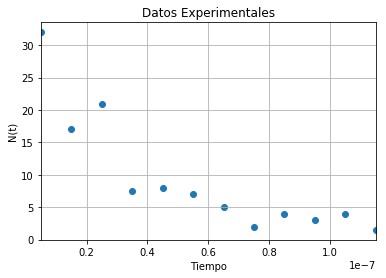

In [2]:
import numpy as np
import matplotlib.pyplot as pl

x1 = 1e-9*np.array([5,15,25,35, 45,55,65,75,85,95, 105,115])
y = np.array([32, 17,21,7.5,8, 7, 5, 2, 4, 3,4,  1.5])

pl.scatter(x1,y)
pl.title("Datos Experimentales")
pl.xlabel("Tiempo")
pl.ylabel("N(t)")
pl.grid("true")
pl.xlim(np.amin(x1), np.amax(x1))
pl.show()



Se busca hallar el tiempo de vida media para los datos encontrados experimentalmente, para ello se parte del modelo planteado inicialmente, donde aplicando logaritmo neperiano a ambos lados se obtiene:

$\ln{N(t)} = \ln{N_{0}}-\lambda t$, donde $\ln{N_{0}} = cte$, por lo que si se define $\ln{N(t)}= f(t)$, se obtiene una ecuación lineal afin con la siguiente forma:

$f(t)= \ln{N_{0}}-\lambda t$, aplicando $\ln$ a los datos experimentales se obtiene la siguiente gráfica

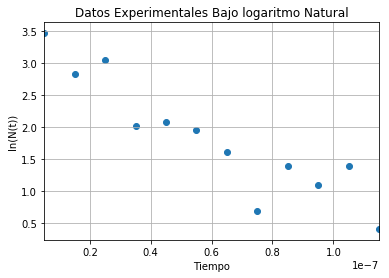

In [3]:
yy =np.log(y)
pl.scatter(x1,yy)
pl.title("Datos Experimentales Bajo logaritmo Natural")
pl.xlabel("Tiempo")
pl.ylabel("ln(N(t))")
pl.grid("true")
pl.xlim(np.amin(x1), np.amax(x1))
pl.show()

Por lo tanto si se realiza un modelo de regresión lineal para los datos, es posible hallar el parámetro $\lambda$, y con este el valor de la vida media de las partículas usando $\frac{1}{\tau}= \lambda$

La función $X^{2}=\sum_{i}^{n} \left(\frac{y_{i}-g(x_{i})}{\sigma_{i}}\right)^{2}$, define el error cuadrático medio del valor de los datos experimentales ($y_{i}$), con una función a elegir ($g_{i}$) que modelará la situación. Dependiendo de la función $g_{i}$ elegida  se tendrán cierta cantidad de parámetros, es decir $g(x_{i},(a_{m}))$, para minimizar el error cuadrático medio naturalmente se realiza : $\frac{\partial X^{2}}{\partial a_{m}}=0 \rightarrow \sum_{i}^{n}\left(\frac{y_{i}-g(x_{i})}{\sigma_{i}^{2}}\frac{\partial g(x_{i})}{\partial a_{m}}\right)=0$ 

Eligiendo $g(x_{i})=a_{1}+a_{2}x_{i}$ (corresponde a una regresión lineal)

Para esta función los pesos $a_{1}$ y $a_{2}$ se calculan de la siguiente forma:


$a_{1}=\frac{S_{xx}S_{y}-S_{x}S_{xy}}{\Delta}$, $a_{2}=\frac{S S_{xy}-S_{x}S_{y}}{\Delta}$

donde:

$\sigma_{i} = \sqrt{N_{i}}$, $S = \sum \frac{1}{\sigma_{i} ^{2}}$ , $S_{x} = \sum \frac{x_{i}}{\sigma_{i} ^{2}}$ ,$S_{y} = \sum \frac{y_{i}}{\sigma_{i} ^{2}}$ , $S_{xx} = \sum \frac{x_{i}^{2}}{\sigma_{i} ^{2}}$ , $S_{xy} = \sum \frac{x_{i}x_{i}}{\sigma_{i} ^{2}}$ , $\Delta = S S_{xx}-S_{x}^{2}$

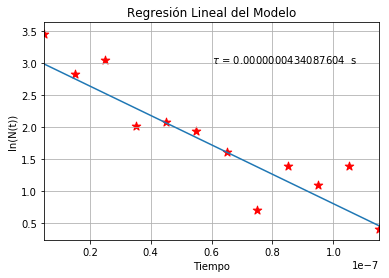

Tiempo de Vida media =  4.3408760436388064e-08


In [8]:
from regresion_lineal import regresion # en la clase regresion_lineal se realiza la regresión lineal de los datos inciales


reg = regresion() # se crea la variable con clase regresion_lineal
regresion_lineal = reg.regresion_lineal(x1,yy) #se envía el valor temporal y los datos f(t) (es decir, ya bajo logaritmo natural) 
f = np.linspace(np.amin(x1),np.amax(x1),100)
reg_prop = regresion_lineal[1]*f+regresion_lineal[0] ## se discriminan los pesos, y se involucran en la ecuación lineal reg_prop
tau = -1/regresion_lineal[1]
pl.scatter(x1,yy, marker='*',facecolor ='red',s = 80)
pl.plot(f,reg_prop)
pl.xlim([np.amin(x1),np.amax(x1)])
pl.title("Regresión Lineal del Modelo")
pl.xlabel("Tiempo")
pl.ylabel("ln(N(t))")
pl.grid("true")
pl.text(0.6e-7, 3, r'$\tau$ = %0.16f  s '%(tau), fontsize=10)
pl.show()
print("Tiempo de Vida media = ",tau)


Este tiempo de vida media hallado con estos pocos datos experimentales, se contrasta con los $2.2e(-08)s$ que se esperaban, se encuentra que el resultado está en el orden de magnitud esperado pero con un $97$% de error.

Para verificar el programa, se usa el modelo de regresión lineal de la librería  sklearn.linear_model y se obtienen los siguientes resultados:


In [12]:
from sklearn.linear_model import LinearRegression
x = x1.reshape((-1, 1))
modelo = LinearRegression()
modelo.fit(x, yy)
modelo = LinearRegression().fit(x, yy)
r_sq = modelo.score(x, yy)
print('Tiempo de Vida media ', -1/modelo.coef_, "s") ### pendiente del modelo

Tiempo de Vida media  [4.20928573e-08] s


Con respecto al modelo de regresión lineal de la librería se obtuvo un $3.11$% de error, por lo que se puede concluir a priori que se necesitan más datos para realizar una mejor aproximación usando la regresión lineal